<h1 style="color:blue" align="center">Machine Learning : Linear Regression With One Variable</h1>

<h3 style="color:magenta">Predicting home price in NCR (INDIA)</h3>

Below table represents current home prices in NCR and test data on right side.

<img src="lr_from_dataset.png" style="width:50%;">

**Problem Statement**: Given above data build a machine learning model that can predict home prices based on square feet area


You can represent values in above table as a scatter plot (values are shown in red markers). After that one can draw a straight line that best fits values on chart. 

<img src="out2.png" style="width:600px;">

You can draw multiple lines like this but we choose the one where total sum of error is minimum

You might remember about linear equation from your high school days math class. Home prices can be presented as following equation,

home price = m * (area) + b

Generic form of same equation is,

<img style="width:50%;" src="linear_equation.png" >

In [17]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,1200,4500000
1,1800,6200000
2,2300,7500000
3,3100,8200000
4,3900,9300000


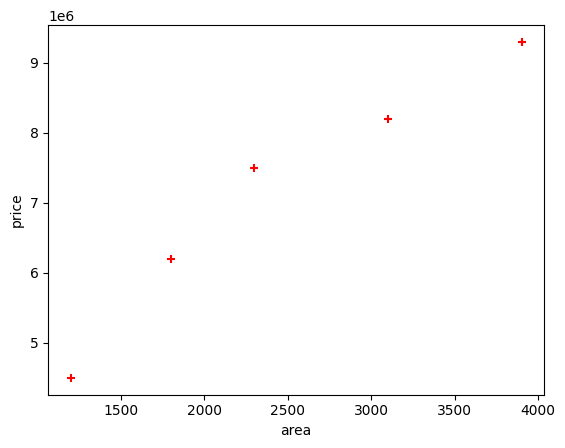

In [19]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [20]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,1200
1,1800
2,2300
3,3100
4,3900


In [21]:
price = df.price
price

0    4500000
1    6200000
2    7500000
3    8200000
4    9300000
Name: price, dtype: int64

In [22]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

**(1) Predict price of a home with area = 3300 sqr ft**

In [23]:
new_data = pd.DataFrame({'area': [3300]})
reg.predict(new_data)
#reg.predict([[3300]])

array([8563106.7961165])

In [24]:
reg.coef_

array([1694.17475728])

In [25]:
reg.intercept_

2972330.0970873795

**Y = m * X + b (m is coefficient and b is intercept)**

In [26]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

**(1) Predict price of a home with area = 5000 sqr ft**

In [27]:
reg.predict([[5000]])

c:\ProgramData\miniconda3\envs\tf_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11443203.88349514])

<h3 style="color:purple">Generate CSV file with list of home price predictions</h3>

In [28]:
area_df = pd.read_csv("areas.csv")
area_df.head(3)

,area
0,1000
1,1500
2,2300


In [29]:
p = reg.predict(area_df)
p

array([ 4666504.85436893,  5513592.23300971,  6868932.03883495,
        8969708.73786408,  9952330.09708738, 10697766.99029126,
       12273349.51456311,  8834174.75728155, 11019660.19417476,
        6868932.03883495, 18219902.91262136, 17542233.00970873,
       15000970.8737864 ])

In [38]:
area_df['prices']=p
area_df

,area,prices
0,1000,4.666505e+06
1,1500,5.513592e+06
2,2300,6.868932e+06
3,3540,8.969709e+06
4,4120,9.952330e+06
5,4560,1.069777e+07
6,5490,1.227335e+07
7,3460,8.834175e+06
8,4750,1.101966e+07
9,2300,6.868932e+06


In [31]:
area_df.to_csv("prediction.csv")

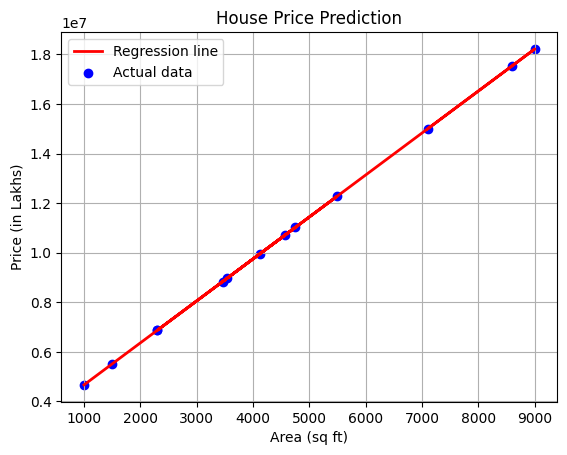

In [35]:
plt.plot(area_df['area'], area_df['prices'], color='red', linewidth=2, label='Regression line')
plt.scatter(area_df['area'], area_df['prices'], color='blue', label='Actual data')
#plt.scatter(X_test, predicted, color='green', label='test data')

plt.xlabel("Area (sq ft)")
plt.ylabel("Price (in Lakhs)")
plt.title("House Price Prediction")
plt.legend()
plt.grid(True)
plt.show()